## 소요리문답 조건부 형태소 빈도 계수
빈도 계수 결과의 다중 키 정렬
소요리 문답 형태소 분석 결괴를 sorted() 함수를 연속적으로 사용하여 (빈도 역순 + 어휘 정순 + 품사 정순)의 다중 키 정렬을 수행한다.

In [1]:
"""
소요리 문답의 주요 품사 형태소 빈도를 계수하여 다중 키로 정렬하여 출력한다.
"""

from collections import Counter
from operator import itemgetter
import mmap
from tqdm import tqdm_notebook
import ujson

MA_KEY1 = "question_ma"
MA_KEY2 = "answer_ma"

MAJOR_POSES = ["NNG", "NNP", "NP", "XR", "VV", "VA", "MAG", "MAJ"]
PRED_POSES = ["VV", "VA"]


def get_num_lines(file_path):
    """빠른 속도로 텍스트 파일의 줄 수를 세어 돌려준다.
    https://blog.nelsonliu.me/2016/07/29/progress-bars-for-python-file-reading-with-tqdm/
    """
    
    fp = open(file_path, "r+")
    buf = mmap.mmap(fp.fileno(), 0)
    lines = 0
    while buf.readline():
        lines += 1
    return lines


def filter_morph_anal(morph_anals):
    """주어진 형태소 분석 결과 리스트에서 필요한 형태소만 골라서 돌려준다."""
    
    morph_anals = [(lex, pos) for lex, pos in morph_anals if is_major_pos(pos)]
    
    return morph_anals


def is_major_pos(pos):
    """주어진 품사의 주요 품사 여부를 판단하여 돌려준다."""
    
    #if pos in MAJOR_POSES:
    #    return True
    #
    #return False
    
    #모든 품사 대상으로 변경
    return True

def is_pred_pos(pos):
    """주어진 품사가 용언 품사인지를 판단하여 돌려준다."""
    
    if pos in PRED_POSES:
        return True
    
    return False


def main():
    """소요리 문답의 주요 품사 형태소 빈도를 계수하여 다중 키로 정렬하여 출력한다."""
    
    morph_counter = Counter()
    input_file_name = "data/catechism/catechism.ma.txt"
    doc_row = []
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in tqdm_notebook(input_file, desc="Reading documents", 
                                  total=get_num_lines(input_file_name)):
            doc = ujson.loads(line)
            doc_row = doc[MA_KEY1]+doc[MA_KEY2]            
            #print("{}".format(doc_row))
            #print("-"*100)
            sent_ma = filter_morph_anal(doc_row)
            #print(sent_ma)
            morph_counter.update(sent_ma)
            #print(morph_counter)
            #print("="*100)
                
    morph_counts = [(l, p, c) for (l, p), c in morph_counter.items()]
    # sorted() 함수를 연속적으로 사용하여 (빈도 역순 + 어휘 정순 + 품사 정순)의 다중 키 정렬을 수행
    print("morph_counts=[{}]".format(morph_counts))
    
    # 어휘,품사,빈도 자료에서 품사 정순으로 정렬
    #print("="*100)
    sorted_morph_counts = sorted(morph_counts, key=itemgetter(1))
    #print("품사 정순으로 정렬, key=itemgetter(1)=[{}]".format(sorted_morph_counts))

    # 어휘,품사,빈도 자료에서 어휘 정순으로 정렬
    #print("*"*100)
    sorted_morph_counts = sorted(sorted_morph_counts, key=itemgetter(0))
    #print("어휘 정순으로 정렬, key=itemgetter(0)=[{}]".format(sorted_morph_counts))

    # 어휘,품사,빈도 자료에서 빈도 정순으로 정렬
    #print("+"*100)
    #sorted_morph_counts = sorted(sorted_morph_counts, key=itemgetter(2), reverse=True)
    #print("빈도 정순으로 정렬, key=itemgetter(2)=[{}]".format(sorted_morph_counts))
                
    for lex, pos, count in sorted_morph_counts:
        if is_pred_pos(pos):
            lex += "다"
            
        print("{}\t{}\t{}".format(lex, pos, count))

#
# 실행
#
main()

/tmp/ipykernel_7288/1299651503.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(input_file, desc="Reading documents",


Reading documents:   0%|          | 0/107 [00:00<?, ?it/s]

morph_counts=[[('사람', 'NNG', 30), ('의', 'JKG', 169), ('제일', 'NNG', 9), ('되', 'VV', 29), ('는', 'ETM', 206), ('목적', 'NNG', 2), ('이', 'JKS', 137), ('무엇', 'NP', 75), ('이', 'VCP', 191), ('ㄴ가', 'EF', 71), ('?', 'SF', 107), ('은', 'JX', 102), ('하나님', 'NNG', 8), ('을', 'JKO', 159), ('영화', 'NNG', 7), ('롭', 'XSA', 6), ('게', 'EC', 91), ('하', 'VV', 96), ('것', 'NNB', 192), ('과', 'JKB', 32), ('영원', 'NNG', 6), ('하', 'XSV', 207), ('도록', 'EC', 5), ('그', 'NP', 24), ('를', 'JKO', 72), ('즐거워하', 'VV', 4), ('다', 'EF', 96), ('.', 'SF', 105), ('하나님', 'NNP', 94), ('께서', 'JKS', 38), ('무슨', 'MM', 7), ('규칙', 'NNG', 4), ('우리', 'NP', 92), ('에게', 'JKB', 47), ('주', 'VX', 8), ('시', 'EP', 173), ('어', 'EC', 30), ('어떻', 'VA', 16), ('자기', 'NP', 16), ('고', 'EC', 63), ('ㄹ', 'ETM', 44), ('지시', 'NNG', 5), ('었', 'EP', 20), ('는가', 'EF', 35), ('신구약', 'NNG', 1), ('성경', 'NNP', 3), ('에', 'JKB', 107), ('기재', 'NNG', 1), ('되', 'XSV', 14), ('ㄴ', 'ETM', 115), ('말씀', 'NNG', 18), ('가', 'JKS', 55), ('유일한', 'NNP', 2), ('요긴', 'XR', 2), ('하', 'X

## 소요리 문답 워드크라우드 그리기
소요리 문답 형태소 분석 결과에서 일반명사(NNG), 고유명사(NNP), 어근(XR)을 대상으로 워드크라우드 그리기를 수행한다.

Reading documents: 100%|█████████████████████████████████████████████████| 107/107 [00:00<00:00, 23712.91it/s]


플랫폼유형 linux
소요리문답


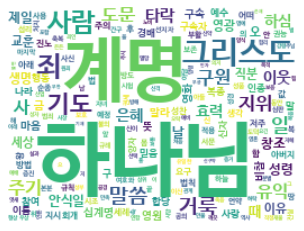

In [2]:
# 워드 클라우드 그리기

import sys
from collections import defaultdict
from collections import Counter
import ujson
import wordcloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import mmap

FEATURE_POSES = ["NNG", "NNP", "XR"]
MA_KEY1 = "question_ma"
MA_KEY2 = "answer_ma"
PRES_KEY = "president"
NUM_WORDS = 200


def read_president_documents(input_file_name):
    """형태소 분석된 소요리 문답 JSON 파일을 읽어서 돌려준다."""
    
    president_documents = defaultdict(list)

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in tqdm(input_file, desc="Reading documents", 
                         total=get_num_lines(input_file_name)):
            json_obj = ujson.loads(line)
            #president = json_obj[PRES_KEY]
            president = "소요리문답"
            doc_row = json_obj[MA_KEY1]+json_obj[MA_KEY2]
            morphs = []

            for morph_lex, morph_cat in doc_row:
                if morph_cat not in FEATURE_POSES:
                    continue
                    
                morphs.append(morph_lex)
            #print("대상 키워드[{}]".format(morphs))
                    
            president_documents[president].extend(morphs)
            
    presidents = []
    documents = []
    
    for president, document in president_documents.items():
        presidents.append(president)
        documents.append(" ".join(document))
            
    return presidents, documents


def get_num_lines(file_path):
    """빠른 속도로 텍스트 파일의 줄 수를 세어 돌려준다.
    https://blog.nelsonliu.me/2016/07/29/progress-bars-for-python-file-reading-with-tqdm/
    """
    
    fp = open(file_path, "r+")
    buf = mmap.mmap(fp.fileno(), 0)
    lines = 0
    while buf.readline():
        lines += 1
    return lines


def read_mask(mask_file_name):
    """주어진 이름의 파일에서 마스킹 이미지 데이터를 읽어서 돌려준다."""
    
    mask = np.array(Image.open(mask_file_name))
    
    return mask
    

def get_word_counts(documents):
    """Get word counts for given documents."""
    
    word_counts = [Counter(document.split()) for document in documents]
    
    return word_counts


def draw_word_clouds(presidents, word_counts, mask):
    """전직 대통령별 연설문의 워드 클라우드를 그린다."""
    
    font_path = get_font_path()
    
    for president, word_count in zip(presidents, word_counts):
        cloud = build_cloud(word_count, font_path, mask)
        show_cloud(president, cloud, mask)
    

def get_font_path():
    """플랫폼에 따라 글꼴 경로를 설정한다."""
    print("플랫폼유형", sys.platform)

    if sys.platform == "win32" or sys.platform == "win64":
        font_path = "C:/Windows/Fonts/malgun.ttf"
    elif sys.platform == "linux":
        font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf"
    elif sys.platform == "darwin":
        font_path = "/Library/Fonts/AppleGothic.ttf"
        
    return font_path


def build_cloud(word_counts, font_path, mask):
    """주어진 어휘 계수 결과와 글꼴 경로를 이용하여 워드 클라우드를 생성하여 돌려준다."""


    cloud_gen = wordcloud.WordCloud(background_color="white",
                                    font_path=font_path, max_words=NUM_WORDS,
                                    mask=mask, collocations=False)
    cloud = cloud_gen.generate_from_frequencies(word_counts)

    return cloud


def show_cloud(president, cloud, mask):
    """워드 클라우드를 화면에 표시한다."""
    
    print(president)
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()   
    
    
def main():
    """소요리 문답을 워드 클라우드로 시각화한다."""
    
    input_file_name = "data/catechism/catechism.ma.txt"
    mask_file_name = "data/catechism/bible.png"
    presidents, documents = read_president_documents(input_file_name)
    mask = read_mask(mask_file_name)
    word_counts = get_word_counts(documents)
    draw_word_clouds(presidents, word_counts, mask)

#  
# 실행
#

main()